In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
import numpy
import pandas as pd

In [3]:
import matplotlib.pyplot as pt

In [4]:
%matplotlib inline

In [5]:
GA=pd.read_csv("C:\\Users\\aedpu\\OneDrive\\Documents\\JAYAPRIYAN\\diamonds.csv")

In [6]:
GA

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [7]:
GA.shape

(53940, 11)

In [8]:
GA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [9]:
newdataset=GA.drop(['Unnamed: 0','cut','color','clarity','depth','table','x','y','z'],axis=1)

In [10]:
newdataset

,carat,price
0,0.23,326
1,0.21,326
2,0.23,327
3,0.29,334
4,0.31,335
...,...,...
53935,0.72,2757
53936,0.72,2757
53937,0.70,2757
53938,0.86,2757


In [11]:
x=newdataset.iloc[:,0].values.reshape(-1,1)
y=newdataset.iloc[:,1].values.reshape(-1,1)

In [12]:
x

array([[0.23],
       [0.21],
       [0.23],
       ...,
       [0.7 ],
       [0.86],
       [0.75]])

In [13]:
y

array([[ 326],
       [ 326],
       [ 327],
       ...,
       [2757],
       [2757],
       [2757]], dtype=int64)

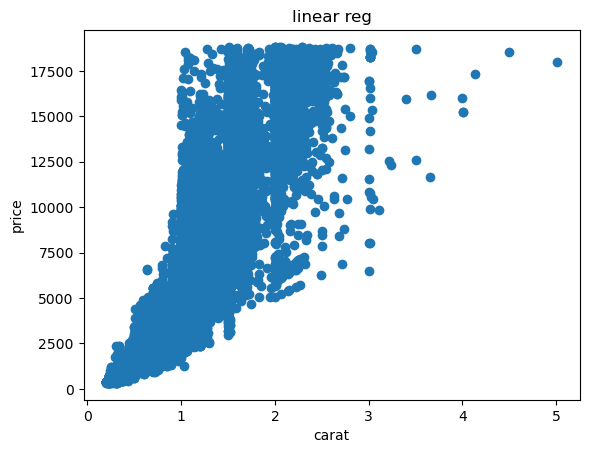

In [14]:
pt.scatter(x,y)
pt.xlabel('carat')
pt.ylabel('price')
pt.title('linear reg')
pt.show()

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=0)

In [17]:
x_train.shape

(37758, 1)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lm=LinearRegression()

In [20]:
lm

LinearRegression()

In [21]:
x_train

array([[1.01],
       [1.54],
       [1.15],
       ...,
       [0.32],
       [0.41],
       [0.91]])

In [22]:
y_train

array([[ 6504],
       [12171],
       [ 5193],
       ...,
       [  505],
       [ 1431],
       [ 3246]], dtype=int64)

In [23]:
lm.fit(x_train,y_train)

LinearRegression()

In [24]:
y_predict=lm.predict(x_test)

In [25]:
y_predict

array([[ 6267.81248226],
       [ 7738.67450143],
       [ 7041.95038709],
       ...,
       [ 9441.77789205],
       [14628.5018544 ],
       [13622.12257813]])

In [26]:
COMP=pd.DataFrame(x_test,columns=['carat'])

In [27]:
COMP

,carat
0,1.10
1,1.29
2,1.20
3,1.50
4,0.90
...,...
16177,0.34
16178,0.38
16179,1.51
16180,2.18


In [28]:
COMP['price']=y_test

In [29]:
COMP

,carat,price
0,1.10,4733
1,1.29,6424
2,1.20,5510
3,1.50,8770
4,0.90,4493
...,...,...
16177,0.34,540
16178,0.38,812
16179,1.51,7723
16180,2.18,14277


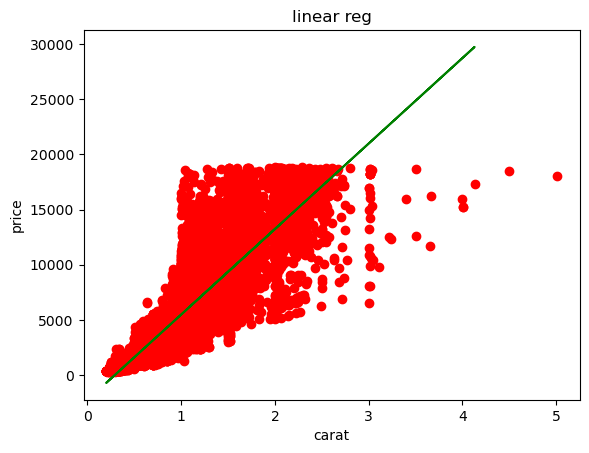

In [30]:
pt.scatter(x,y,color='red')
pt.plot(x_test,y_predict,color='green')
pt.xlabel('carat')
pt.ylabel('price')
pt.title('linear reg')
pt.show()

In [31]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [32]:
mean_squared_error(y_test,y_predict)

2372901.2792871664

In [33]:
mean_absolute_error(y_test,y_predict)

1002.1962617257723